# Dependencies (if using Binder)

In [1]:
#Important!
#Uncomment and run this cell if using Binder
#!pip install numpy
#!pip install pandas
#!pip install sklearn
#!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import unicodedata
from sklearn.cluster import AffinityPropagation
from sklearn.manifold import TSNE
import seaborn as sns

from functions import *

# Example 1

In [3]:
#Fill up the DataFrame with our words
df1 = pd.DataFrame({"words":["canada","keneda","vague","wag","dangerous"]})

In [4]:
#Find the double-metaphone code(s) for each word
dms_1 = []
for i in range(len(df1)):
    dms_1.append(dm(df1.iloc[i]["words"]))

In [5]:
#Create a new column in the DataFrame
df1["double_metaphone"] = dms_1

In [6]:
#Build the affinity matrix
af_ma1 = affinity_matrix(df1["words"], "double_metaphone", 1)

In [7]:
af_ma1

array([[ 0,  0, -4, -4, -5],
       [ 0,  0, -4, -4, -5],
       [-4, -4,  0,  0, -5],
       [-4, -4,  0,  0, -5],
       [-5, -5, -5, -5,  0]])

In [8]:
#Begin the Affinity Propagation
AP1 = AffinityPropagation(affinity='precomputed')

In [9]:
#Predict cluster membership for each word
clusters1 = AP1.fit_predict(af_ma1)

In [10]:
#Create a new cluster column
df1["cluster"] = clusters1

In [11]:
df1

,words,double_metaphone,cluster
0,canada,"(KNT, )",0
1,keneda,"(KNT, )",0
2,vague,"(FK, )",1
3,wag,"(AK, FK)",1
4,dangerous,"(TNJRS, TNKRS)",2


# Example 2

In [12]:
#Build our DataFrame
df2 = pd.DataFrame({"words":["their","dere","there","too","two","do","vaffle","waffle","baffle","vogue","rogue","wog","celsey","kelsey"]})

In [13]:
#Compute the double-metaphone code(s) of each word
dms_2 = []
for i in range(len(df2)):
    dms_2.append(dm(df2.iloc[i]["words"]))

In [14]:
#Create a new column of double-metaphone code(s)
df2["double_metaphone"] = dms_2

In [15]:
#Build the affinity matrix
af_ma2 = affinity_matrix(df2["words"],"double_metaphone",1)

In [16]:
af_ma2

array([[ 0,  0,  0, -1, -1, -1, -4, -4, -4, -3, -3, -3, -4, -4],
       [ 0,  0,  0, -1, -1, -1, -4, -4, -4, -3, -3, -3, -4, -4],
       [ 0,  0,  0, -1, -1, -1, -4, -4, -4, -3, -3, -3, -4, -4],
       [-1, -1, -1,  0,  0,  0, -4, -4, -4, -3, -3, -3, -4, -4],
       [-1, -1, -1,  0,  0,  0, -4, -4, -4, -3, -3, -3, -4, -4],
       [-1, -1, -1,  0,  0,  0, -4, -4, -4, -3, -3, -3, -4, -4],
       [-4, -4, -4, -4, -4, -4,  0,  0, -2, -2, -4, -2, -4, -4],
       [-4, -4, -4, -4, -4, -4,  0,  0, -2, -2, -4, -2, -4, -4],
       [-4, -4, -4, -4, -4, -4, -2, -2,  0, -3, -4, -3, -4, -4],
       [-3, -3, -3, -3, -3, -3, -2, -2, -3,  0, -2,  0, -4, -4],
       [-3, -3, -3, -3, -3, -3, -4, -4, -4, -2,  0, -2, -4, -4],
       [-3, -3, -3, -3, -3, -3, -2, -2, -3,  0, -2,  0, -4, -4],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4,  0, -2],
       [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -2,  0]])

In [17]:
#Begin the Affinity Propagation
AP2 = AffinityPropagation(affinity='precomputed')

In [18]:
#Predict cluster memberships
clusters2 = AP2.fit_predict(af_ma2)

In [19]:
#Create a cluster column for the DataFrame
df2["cluster"] = clusters2

In [20]:
df2

,words,double_metaphone,cluster
0,their,"(0R, TR)",0
1,dere,"(TR, )",0
2,there,"(0R, TR)",0
3,too,"(T, )",1
4,two,"(T, )",1
5,do,"(T, )",1
6,vaffle,"(FFL, )",2
7,waffle,"(AFL, FFL)",2
8,baffle,"(PFL, )",2
9,vogue,"(FK, )",3


In [21]:
#Create distance matrix for t-SNE to use
di_ma2 = -af_ma2

In [22]:
#Initialize t-SNE with n_components=2 and perplexity=3
tsne2 = TSNE(n_components=2, perplexity=3, metric='precomputed')

In [23]:
#Create X and Y Axes from t-SNE
TCs = pd.DataFrame(tsne2.fit_transform(di_ma2))
TCs.columns = ["TCX","TCY"]

In [24]:
#Add the t-SNE columns to the DataFrame
df2 = pd.concat([df2,TCs], axis=1, join='inner')

In [25]:
#Need to know in order to colour the plot properly
num_clusters2 = len(df2["cluster"].value_counts())

Text(0.5, 1.0, 't-SNE plot with perplexity=3')

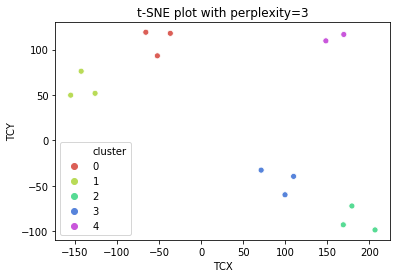

In [26]:
#Plot the data
title = "t-SNE plot with perplexity=3"
ax = sns.scatterplot(x="TCX", y="TCY", hue="cluster", palette=sns.color_palette("hls", num_clusters2), data=df2)
ax.set_title(title)